### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.kernel_approximation import PolynomialCountSketch

### Configurações gerais

In [2]:
# Paleta de cor
cmap = plt.cm.Set3
# Grau do polinômio
degree=3

### Gerando dados aleatórios - Toy data

In [3]:
#X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
X, y = make_moons(n_samples=500, noise=0.05)

### Plotando as amostras como pontos em um gráfico bidimensional

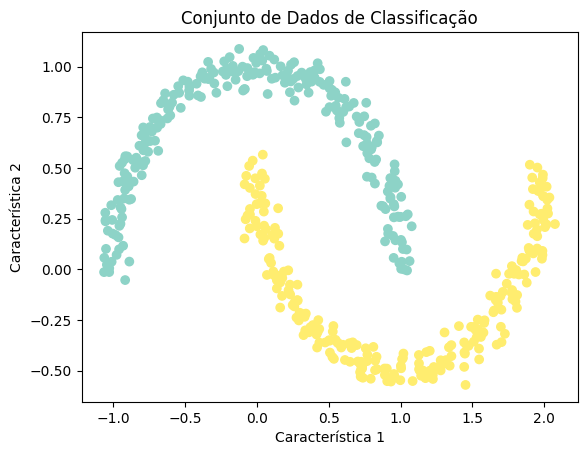

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Dados de Classificação')
plt.show()

### Pre-processamento

In [5]:
# Escalando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Kernel Polinomial

In [6]:
# Criando o modelo SVM com kernel polinomial
poly_kernel = SVC(kernel='poly', degree=degree, coef0=1)

In [7]:
# Treinando o modelo
poly_kernel.fit(X, y)

SVC(coef0=1, kernel='poly')

### Visualizando fronteira de decisão

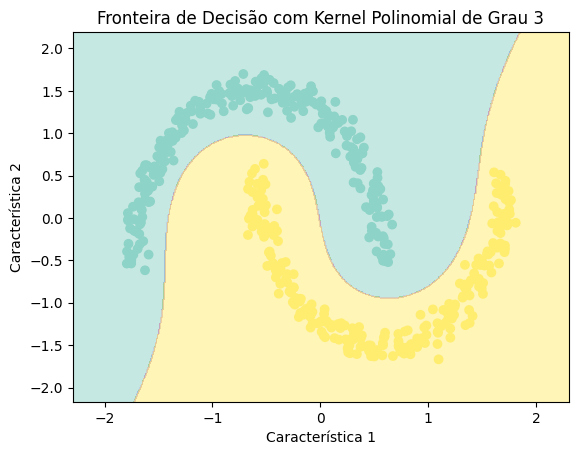

In [8]:
# Definindo os limites do gráfico
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Criando uma malha de pontos para avaliar a fronteira de decisão
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = poly_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão e os pontos de dados
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title(f'Fronteira de Decisão com Kernel Polinomial de Grau {degree}')
plt.show()

### Kernel polinomial - NumPy

In [9]:
# Definindo a classe do kernel polinomial
class PolynomialKernel:
    def __init__(self, degree):
        self.degree = degree

    def __call__(self, X, Y):
        return np.power((np.dot(X, Y.T) + 1), self.degree)

# Criando uma instância da classe PolynomialKernel com grau 3
poly_kernel = PolynomialKernel(degree=3)

# Calculando o kernel polinomial de grau 3 entre X e X
K = poly_kernel(X, X)